In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [5]:
import pandas as pd
df=pd.read_csv("C:/Users/dasar/Downloads/credit card.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [20]:
df.shape

(6362620, 11)

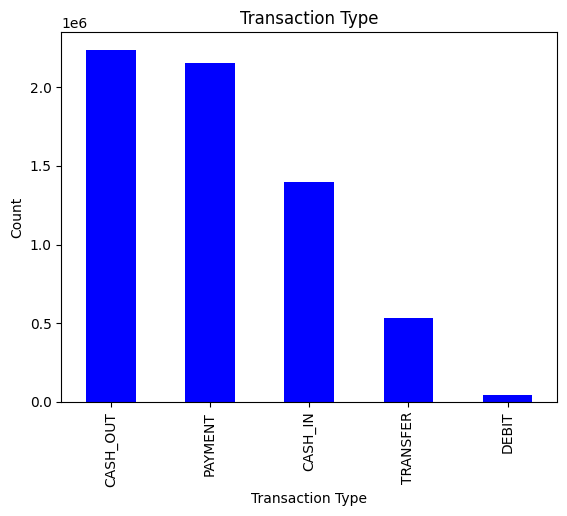

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("C:/Users/dasar/Downloads/credit card.csv")
df["type"].value_counts().plot(kind="bar", title="Transaction Type", color="blue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

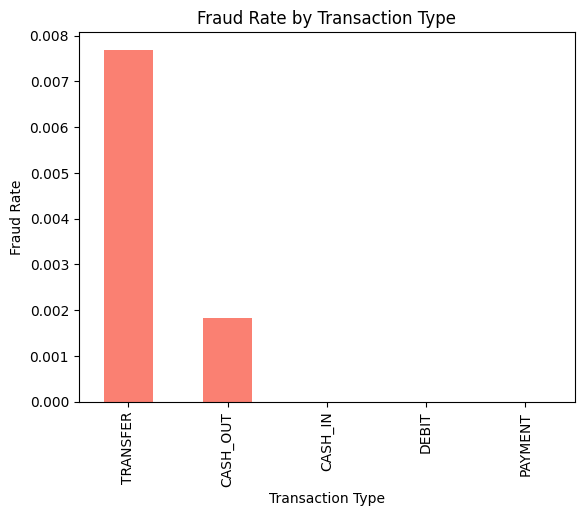

In [7]:
import matplotlib.pyplot as plt
Fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
Fraud_by_type.plot(kind="bar", title="Fraud Rate by Transaction Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.show()

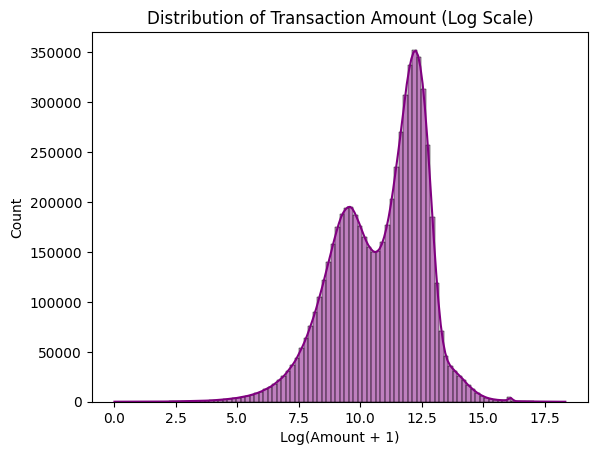

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df["amount"].describe().astype(int)
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="purple")
plt.title("Distribution of Transaction Amount (Log Scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

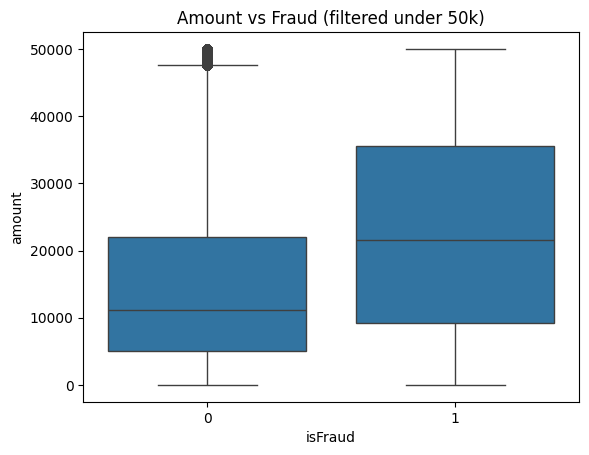

In [5]:
import pandas as pd
df = pd.read_csv("C:/Users/dasar/Downloads/credit card.csv")
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df["amount"] < 50000]
sns.boxplot(x="isFraud", y="amount", data=filtered_df)
plt.title("Amount vs Fraud (filtered under 50k)")
plt.show()

In [6]:
df["balanceDiffOrg"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["oldbalanceDest"]-df["newbalanceDest"]
(df["balanceDiffOrg"]<0).sum()
(df["balanceDiffDest"]<0).sum()

np.int64(2806464)

In [7]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


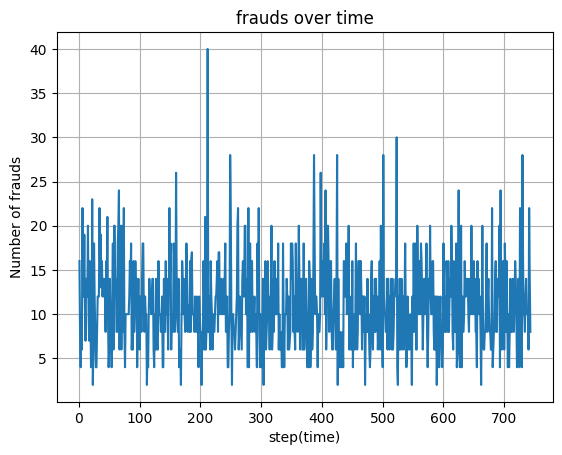

In [9]:
import matplotlib.pyplot as plt
fraud_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, label="fraud per step")
plt.xlabel("step(time)")
plt.ylabel("Number of frauds")
plt.title("frauds over time")
plt.grid(True)
plt.show()


In [10]:
df.drop(columns="step",inplace=True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [11]:
top_senders=df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [12]:
top_recievers=df["nameDest"].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [13]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

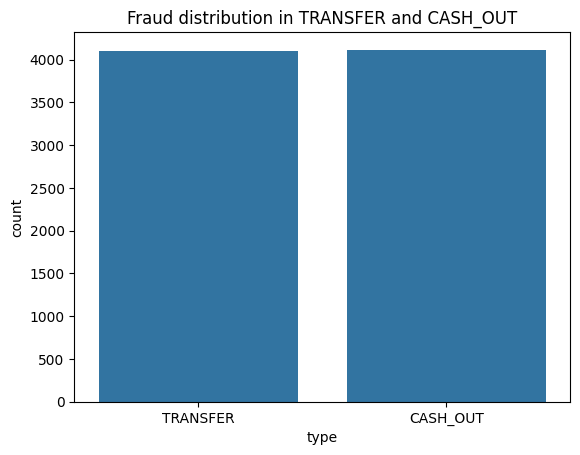

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for frauds and transaction types "CASH_OUT" and "TRANSFER"
fraud_type = df[(df["isFraud"] == 1) & (df["type"].isin(["CASH_OUT", "TRANSFER"]))]

sns.countplot(data=fraud_type, x="type")
plt.title("Fraud distribution in TRANSFER and CASH_OUT")
plt.show()

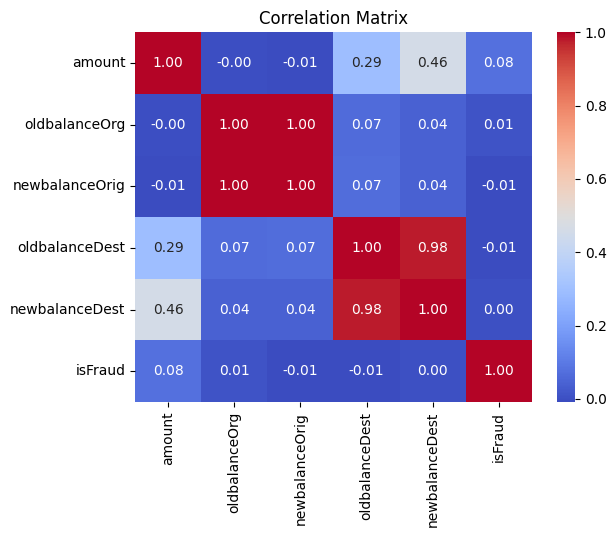

In [17]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
zero_after_transfer=df[(df["oldbalanceOrg"]>0) & (df["newbalanceOrig"]==0)& (df["type"].isin(["CASH_OUT", "TRANSFER"]))]
len(zero_after_transfer)

1188074

In [19]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [21]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [24]:
df.model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df.model.head()
categorical=["type"]
numerical=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

C:\Users\dasar\AppData\Local\Temp\ipykernel_17976\1381061283.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)


In [25]:
y=df.model["isFraud"]
x=df.model.drop("isFraud",axis=1)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)

In [29]:
remainder="drop"

In [31]:
pipeline = Pipeline([
	("prep", preprocessor),
	("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(pipeline.score(x_test, y_test) * 100))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

[[1805622  100700]
 [    155    2309]]
Accuracy: 94.72%


In [32]:
import joblib
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']